In [1]:
from quchem.Hamiltonian_Generator_Functions import *
from quchem.Graph import *
### HAMILTONIAN start
Molecule = 'LiH'
geometry = None # [('H', (0., 0., 0.)), ('H', (0., 0., 0.74))]
basis = 'sto-6g'


### Get Hamiltonian
Hamilt = Hamiltonian(Molecule,
                     run_scf=1, run_mp2=1, run_cisd=1, run_ccsd=1, run_fci=1,
                     basis=basis,
                     multiplicity=1,
                     geometry=geometry)  # normally None!
QubitHamiltonian = Hamilt.Get_Qubit_Hamiltonian(threshold=None, transformation='BK')
### HAMILTONIAN end


The LiH ground state under JW is:

$$|\psi \rangle_{HF}^{ground} = | 1 1 1 1 \:  0 0 0 0 0 0 0 0 \rangle$$

and under BK is:

$$|\psi \rangle_{HF}^{ground} = | 1 0 1 0 0 0 0 0 0 0 0 0 \rangle$$

Use NOON to reduces this:

In [2]:
from quchem.Ansatz_Generator_Functions import *

##
NOON_spins_combined, NMO_basis = Hamilt.Get_NOON()
##
Hamilt.Get_CCSD_Amplitudes()

NOON_spins_combined

array([1.99991509e+00, 1.96744892e+00, 2.71958861e-02, 7.94453898e-05,
       2.68032899e-03, 2.68032899e-03])

LOOK at PHYS. REV. X, **8**, 031022 (2018)

Due to NOON:
- indices 0,1 assumed to ALWAYS be filled
- indices 8,9 and 10,11 ALWAYS unfilled! <--- decision



# Therefore Simplify Hamiltonian

In [3]:
ansatz_obj = BK_Qubit_Reduction(QubitHamiltonian,
                             Hamilt.molecule.n_electrons,
                             Hamilt.molecule.n_qubits)

The LiH ground state under JW is:

$$|\psi \rangle_{HF}^{ground} = | 1 1 1 1 \:  0 0 0 0 0 0 0 0 \rangle$$

and under BK is:

$$|\psi \rangle_{HF}^{ground} = | 1 0 1 0 0 0 0 0 0 0 0 0 \rangle$$


we have **fixed occupations** of indices [0,1,8,9,10,11]

- therefore can remove these terms from the Hamiltonian!

In [4]:
list_of_qubit_indices_to_remove = [0,1,8,9,10,11]
reduced_Qubit_Hamiltonian = ansatz_obj.Remove_indices_from_Hamiltonian(list_of_qubit_indices_to_remove)
print('Hamiltonian size reduced: {} --> {}'.format(len(list(QubitHamiltonian)), len(list(reduced_Qubit_Hamiltonian))))

Hamiltonian size reduced: 631 --> 239


In [5]:
qubit_re_label_dict, reduced_RE_LABELLED_Qubit_Hamiltonian = ansatz_obj.Re_label_Hamiltonian(reduced_Qubit_Hamiltonian)
reduced_RE_LABELLED_Qubit_Hamiltonian

(-7.170070919568305+0j) [] +
(-0.01896867446228722+0j) [X0] +
(0.009702964590343796+0j) [X0 X1 X2 X3] +
(-0.0012091978607674074+0j) [X0 X1 X2 Y5] +
(-0.0016354065601825083+0j) [X0 X1 Y2 X3] +
(-0.00020377653620311275+0j) [X0 X1 Y2 Y3 Z4 Z5] +
(0.0012091978607674074+0j) [X0 X1 Y2 Z3 Y5] +
(0.001635406560182508+0j) [X0 X1 Z2 X3] +
(0.00488953965154737+0j) [X0 X1 Z2 Y3 Y4 Z5] +
(-0.0038464821371521625+0j) [X0 X1 Z2 Z3 Y5] +
(-0.002637284276384755+0j) [X0 X1 Z2 Y5] +
(0.004031651676556207+0j) [X0 X1 X4 Y5] +
(-0.00976749332732196+0j) [X0 X1 Z4 Y5] +
(-0.02349046009952933+0j) [X0 X1 Y5] +
(0.0016354065601825083+0j) [X0 Y1 X2 X3] +
(0.00034734865840738377+0j) [X0 Y1 X2 Y3] +
(0.004873629924008761+0j) [X0 Y1 Y2 X3] +
(0.004685763115344257+0j) [X0 Y1 Y2 X3 Z4] +
(-0.005771973313220177+0j) [X0 Y1 Z2 X3] +
(-0.0026924962465502524+0j) [X0 Y1 Y3] +
(-0.00488953965154737+0j) [X0 Y1 Y3 X4] +
(-0.004031651676556207+0j) [X0 Y1 Z3 Y4 X5] +
(-0.005735841650765756+0j) [X0 Y1 Z3 Z4 X5] +
(0.03998383732969

## Looking at Ansatz

In [6]:
# automate:
# reduced_Sec_Quant_CC_ops_ia, reduced_Sec_Quant_CC_ops_ijab, reduced_theta_parameters_ia, reduced_theta_parameters_ijab =ansatz_obj.Remove_NOON_terms(
#     NOON=NOON_spins_combined,
#     occ_threshold= 1.999,
#     unocc_threshold=1e-4,
#     indices_to_remove_list_manual=None, 
#     single_cc_amplitudes=Hamilt.molecule.single_cc_amplitudes,
#     double_cc_amplitudes=Hamilt.molecule.double_cc_amplitudes,
#     singles_hamiltonian=Hamilt.singles_hamiltonian,
#     doubles_hamiltonian=Hamilt.doubles_hamiltonian,
#     tol_filter_small_terms=None)

# manual
reduced_Sec_Quant_CC_ops_ia, reduced_Sec_Quant_CC_ops_ijab, reduced_theta_parameters_ia, reduced_theta_parameters_ijab =ansatz_obj.Remove_NOON_terms(
    NOON=NOON_spins_combined,
    indices_to_remove_list_manual=[0,1,8,9,10,11])

In [7]:
ia_terms, ijab_terms, ia_theta, ijab_theta = ansatz_obj.Get_ia_and_ijab_terms()
print('REDUCTION')
print('ia_terms', len(ia_terms), 'TO', len(reduced_Sec_Quant_CC_ops_ia))
print('ijab_terms', len(ijab_terms), 'TO', len(reduced_Sec_Quant_CC_ops_ijab))

REDUCTION
ia_terms 16 TO 4
ijab_terms 42 TO 3


In [8]:
Qubit_Op_list_Second_Quant_CC_Ops_ia, Qubit_Op_list_Second_Quant_CC_Ops_ijab = ansatz_obj.UCCSD_single_trotter_step(reduced_Sec_Quant_CC_ops_ia,
                                                                                                                    reduced_Sec_Quant_CC_ops_ijab)

# # NO reduction!
# Qubit_Op_list_Second_Quant_CC_Ops_ia, Qubit_Op_list_Second_Quant_CC_Ops_ijab = ansatz_obj.UCCSD_single_trotter_step(ia_terms,
#                                                                                                                     ijab_terms)


In [9]:
reduced_CC_ijab = ansatz_obj.Remove_indices_from_CC_qubit_operators(Qubit_Op_list_Second_Quant_CC_Ops_ijab, list_of_qubit_indices_to_remove)
len(reduced_CC_ijab)

3

In [10]:
reduced_RE_LABELLED_CC_ijab = ansatz_obj.Re_label_CC_qubit_operators( qubit_re_label_dict, 
                                                                   reduced_CC_ijab)
reduced_RE_LABELLED_CC_ijab

[0.125j [X0 X1 X2 Y3] +
 0.125j [X0 X1 Y2 X3] +
 -0.125j [X0 Y1 X2 X3] +
 0.125j [X0 Y1 Y2 Y3] +
 -0.125j [Y0 X1 X2 X3] +
 0.125j [Y0 X1 Y2 Y3] +
 -0.125j [Y0 Y1 X2 Y3] +
 -0.125j [Y0 Y1 Y2 X3],
 0.125j [X0 X1 X2 Z3 Z4 Y5] +
 0.125j [X0 X1 Y2 Z3 Z4 X5] +
 -0.125j [X0 Y1 X2 Z3 Z4 X5] +
 0.125j [X0 Y1 Y2 Z3 Z4 Y5] +
 -0.125j [Y0 X1 X2 Z3 Z4 X5] +
 0.125j [Y0 X1 Y2 Z3 Z4 Y5] +
 -0.125j [Y0 Y1 X2 Z3 Z4 Y5] +
 -0.125j [Y0 Y1 Y2 Z3 Z4 X5],
 0.125j [X0 X1 X4 Y5] +
 0.125j [X0 X1 Y4 X5] +
 -0.125j [X0 Y1 X4 X5] +
 0.125j [X0 Y1 Y4 Y5] +
 -0.125j [Y0 X1 X4 X5] +
 0.125j [Y0 X1 Y4 Y5] +
 -0.125j [Y0 Y1 X4 Y5] +
 -0.125j [Y0 Y1 Y4 X5]]

In [11]:
reduced_CC_ia = ansatz_obj.Remove_indices_from_CC_qubit_operators(Qubit_Op_list_Second_Quant_CC_Ops_ia, list_of_qubit_indices_to_remove)

reduced_RE_LABELLED_CC_ia = ansatz_obj.Re_label_CC_qubit_operators( qubit_re_label_dict, 
                                                                   reduced_CC_ia)
reduced_RE_LABELLED_CC_ia

[-0.5j [X0 Z1 Y2] +
 0.5j [Y0 Z1 X2],
 -0.5j [X0 Z1 Z2 Z3 Y4] +
 0.5j [Y0 Z1 Z2 Z3 X4],
 -0.5j [X1 Z2 Y3] +
 0.5j [Y1 Z2 X3],
 -0.5j [X1 Z2 Z3 Z4 Y5] +
 0.5j [Y1 Z2 Z3 Z4 X5]]

## HF input state

In [12]:
print('old input = ', ansatz_obj.Get_BK_HF_state_in_OCC_basis())

print('BUT following indices removed:', list_of_qubit_indices_to_remove)

ansatz_obj.New_BK_HF_state(list_of_qubit_indices_to_remove)

old input =  [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
BUT following indices removed: [0, 1, 8, 9, 10, 11]


array([1., 0., 0., 0., 0., 0.])

In [13]:
ansatz_obj.New_BK_HF_state(list_of_qubit_indices_to_remove)

array([1., 0., 0., 0., 0., 0.])

# Ansatz

look at: From PHYS. REV. X, **8**, 031022 (2018)

can make a further reduction!

In [14]:
N_QUBITS = Hamilt.molecule.n_qubits - len(list_of_qubit_indices_to_remove)
# or len(ansatz_obj.New_BK_HF_state(list_of_qubit_indices_to_remove))

N_electrons = int(sum(ansatz_obj.New_BK_HF_state(list_of_qubit_indices_to_remove)))

full_ansatz_Q_Circ = Ansatz_Circuit(reduced_RE_LABELLED_CC_ia, reduced_RE_LABELLED_CC_ijab,
             N_QUBITS, N_electrons, manual_HF_state=ansatz_obj.New_BK_HF_state(list_of_qubit_indices_to_remove))

ansatz_cirq_circuit = full_ansatz_Q_Circ.Get_Full_HF_UCCSD_QC(reduced_theta_parameters_ia, 
                                                              reduced_theta_parameters_ijab,
                                                              transformation='BK')

print(ansatz_cirq_circuit.to_text_diagram(transpose=True)) 

0         1         2         3         4         5
│         │         │         │         │         │
X         │         H         │         H         H
│         │         │         │         │         │
Rx(0.5π)  │         │         │         │         │
│         │         │         │         │         │
@─────────X         │         │         │         │
│         │         │         │         │         │
│         @─────────X         │         │         │
│         │         │         │         │         │
│         │         Rz(-0.0π) │         │         │
│         │         │         │         │         │
│         @─────────X         │         │         │
│         │         │         │         │         │
@─────────X         H         │         │         │
│         │         │         │         │         │
Rx(-0.5π) │         Rx(0.5π)  │         │         │
│         │         │         │         │         │
H         │         │         │         │         │
│         │ 

# Running Example

In [15]:
from quchem.Simulating_Quantum_Circuit import *

In [16]:
n_shots= 100


def VQE_experiment_ENERGY(theta_ia_ijab_list):
    
    theta_ia = theta_ia_ijab_list[0:len(reduced_theta_parameters_ia)]
    theta_ijab = theta_ia_ijab_list[len(reduced_theta_parameters_ijab)::]
    
    ansatz_cirq_circuit = full_ansatz_Q_Circ.Get_Full_HF_UCCSD_QC(theta_ia, 
                                                              theta_ijab,
                                                              transformation='BK')
    
    VQE_exp = VQE_Experiment(reduced_RE_LABELLED_Qubit_Hamiltonian, ansatz_cirq_circuit, n_shots)
    return VQE_exp.Calc_Energy().real

In [28]:
import random

theta_ia_random_input = [random.uniform(0, 2*np.pi) for _ in range(len(reduced_theta_parameters_ia))]
theta_ijab_random_input = [random.uniform(0, 2*np.pi) for _ in range(len(reduced_theta_parameters_ijab))]

theta_combined_random_input = [*theta_ia_random_input, *theta_ijab_random_input]

VQE_experiment_ENERGY(theta_combined_random_input)

-7.012344343741415

In [22]:
Hamilt.molecule.fci_energy

array(-7.78446028)

In [19]:
### optimizer
from quchem.Scipy_Optimizer import *

GG = Optimizer(VQE_experiment_ENERGY, theta_combined_random_input, 'Nelder-Mead', store_values=True, display_iter_steps=True,
               tol=1e-5,
               display_convergence_message=True)
GG.get_env(50)
GG.plot_convergence()
plt.show()

KeyboardInterrupt: 

In [30]:
from quchem.Adam_Optimizer import *

def calc_gradient_ADAM(theta_ia_theta_jab_list):
    
    grad_list=[]
    
    for index, theta in enumerate(theta_ia_theta_jab_list):
        
        new_theta_list = theta_ia_theta_jab_list.copy()
        new_theta_list[index] = theta + np.pi/4
        
        Obs_PLUS = VQE_experiment_ENERGY(new_theta_list)
               
        
        new_theta_list[index] = theta - np.pi/4
        Obs_MINUS = VQE_experiment_ENERGY(new_theta_list)
        
        gradient = Obs_PLUS - Obs_MINUS
        
        grad_list.append(gradient)
        

    return np.array(grad_list)

In [31]:
opt_params, list_of_inputs, list_of_outputs = Adam_Opt(theta_combined_random_input, VQE_experiment_ENERGY,
                                                       calc_gradient_ADAM, 
                                                       learning_rate=0.1, 
                                                       beta_1=0.9, 
                                                       beta_2=0.999, 
                                                       epsilon=1e-8,
                                                       max_iter=50,
                                                       disp=True,
                                                       tolerance=1e-3,
                                                       store_steps=True)

# VQE_experiment_ENERGY(opt_params)

step: 1 input:[4.94084884 6.3798796  1.22462092 4.98977584 2.80621701 0.27513636
 4.61538946] obj_funct: -7.038916605936252
step: 2 input:[5.03932481 6.45541995 1.16181198 5.06650073 2.90180229 0.31773501
 4.51803486] obj_funct: -7.11068621485471
step: 3 input:[5.13714639 6.49435895 1.18330285 5.15180708 2.99222119 0.34997884
 4.50926358] obj_funct: -7.121521862779699
step: 4 input:[5.23601101 6.5520528  1.20209412 5.20016967 3.077509   0.37477498
 4.47226047] obj_funct: -7.197085189907162
step: 5 input:[5.3354003  6.564499   1.23902337 5.21931232 3.16720053 0.42131941
 4.40950632] obj_funct: -7.193687343485735
step: 6 input:[5.4357119  6.53252961 1.22212439 5.24394333 3.25446535 0.43159497
 4.38257265] obj_funct: -7.251477087217913
step: 7 input:[5.53689614 6.47611931 1.24067826 5.21760936 3.34115184 0.45204299
 4.33177894] obj_funct: -7.449766345956404
step: 8 input:[5.6388167  6.41583019 1.24723845 5.21044713 3.37958579 0.47136401
 4.31507813] obj_funct: -7.493259271471508
step: 9 i

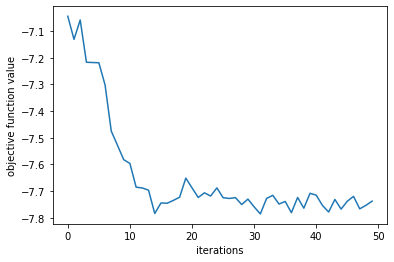

In [32]:
import matplotlib.pyplot as plt
# % matplotlib inline
plt.figure()
plt.plot(list_of_outputs)
plt.xlabel('iterations')
plt.ylabel('objective function value')
plt.show()

# Using measurement reduction!

In [24]:
from quchem.LCU_method import *

In [25]:
Hamiltonian_graph_obj = Openfermion_Hamiltonian_Graph(reduced_RE_LABELLED_Qubit_Hamiltonian)

commutativity_flag = 'AC' ## <- defines relationship between sets!!!
plot_graph = False
Graph_colouring_strategy='largest_first'
anti_commuting_sets = Hamiltonian_graph_obj.Get_Clique_Cover_as_QubitOp(commutativity_flag, Graph_colouring_strategy=Graph_colouring_strategy, plot_graph=plot_graph)
anti_commuting_sets

Building Graph Edges: 100%|##########| 239/239 [00:02<00:00, 102.56it/s]


{0: [(0.07823637778985244+0j) [Z1 Z3 Z5]],
 1: [(-7.170070919568305+0j) []],
 2: [(-0.14453638564662347+0j) [Z1 Z3 Z4 Z5],
  (0.0055775651340550965+0j) [Z1 Z3 Y4 Z5],
  (0.010522977441818161+0j) [X4]],
 3: [(-0.14453638564662347+0j) [Z4],
  (0.0055775651340550965+0j) [Y4],
  (0.010522977441818161+0j) [Z1 Z3 X4 Z5]],
 4: [(0.033722569214841416+0j) [Z0],
  (-0.01896867446228722+0j) [X0],
  (0.05493833181411909+0j) [Y0]],
 5: [(-0.13300290386455665+0j) [Z2 Z3],
  (0.004873629924008756+0j) [X1 Z2 X3],
  (0.012458849604517958+0j) [Y2],
  (0.02218840259886891+0j) [X2],
  (-0.002562389780011484+0j) [X1 Z2 Y3 X4 Z5],
  (0.03357448433055081+0j) [Z1 Z2 X3 Y5],
  (-0.002562389780011484+0j) [X1 Z2 Y3 Y4 Z5],
  (0.0010954854746108708+0j) [Y1 Z2 X3 Z4]],
 6: [(-0.1330029038645566+0j) [Z2],
  (0.012458849604517958+0j) [Y2 Z3],
  (0.005771973313220177+0j) [X1 Y2 X3],
  (0.004873629924008761+0j) [X0 Y1 Y2 X3],
  (-0.002950384991514586+0j) [Z1 Y2 X3 Y5],
  (0.00488953965154737+0j) [Z0 X1 Y2 Y3 X4 Z5],
 

In [26]:
N_QUBITS = Hamilt.molecule.n_qubits - len(list_of_qubit_indices_to_remove)
n_shots= 100


full_ansatz_Q_Circ = Ansatz_Circuit(reduced_RE_LABELLED_CC_ia, reduced_RE_LABELLED_CC_ijab,
         N_QUBITS, N_electrons, manual_HF_state=ansatz_obj.New_BK_HF_state(list_of_qubit_indices_to_remove))

def GIVE_ENERGY(theta_ia_theta_jab_list):
    theta_ia = theta_ia_theta_jab_list[:len(reduced_theta_parameters_ia)]
    theta_ijab = theta_ia_theta_jab_list[len(reduced_theta_parameters_ijab):]
    
    ansatz_cirq_circuit = full_ansatz_Q_Circ.Get_Full_HF_UCCSD_QC(theta_ia, 
                                                              theta_ijab,
                                                              transformation='BK')

    VQE_exp_LCU =  VQE_Experiment_LCU_UP(anti_commuting_sets,
                     ansatz_cirq_circuit,
                     n_shots,
                     N_QUBITS,
                     N_indices_dict=None)#{7:0, 8:1, 9:0, 10:1})
    
    return VQE_exp_LCU.Calc_Energy().real

In [29]:
GIVE_ENERGY(theta_combined_random_input)

-7.047205233817895